# Regressão Linear

<br>
<img src="img/lr.png" width="350" />
<br>

Em estatística ou econometria, regressão linear é uma equação para se estimar a condicional (valor esperado) de uma variável y, dados os valores de algumas outras variáveis x.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros.

# Análise de dados e introdução a Regressão


## Forma do modelo linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ é a variável dependente (a resposta)
- $\beta_0$ é o termo de intercepção
- $\beta_1$ é o coeficiente para $x_1$ 
- $\beta_n$ é o coeficiente para $x_n$

Os **$\beta$** são os chamados **_Coeficientes do modelo_**

- Esses valores são estimados (ou "aprendidos") no processo de adaptação do modelo utilizando o critério **mínimos quadrados**.
- Especificamente, encontramos a linha (matematicamente) que minimiza a adição **de quadrados de resíduos** (ou “total de erros quadráticos”).
- E quando já tivermos aprendido esses coeficientes, podemos usar o modelo para prever a resposta.

## Operação vetorial (multidimensioanal)

Ao usar a base de dados com $k$ variáveis explicativas e $n$ observações, o modelo pode ser escrito na forma matricial:

<br>
<img src="img/regressao_matriz.PNG" width="450" />
<br>

## Pré-requisitos do modelo de regressão Linear

A maioria dos testes estatísticos depende de suposições sobre as variáveis. Para tirar conclusões sobre as estimativas para um modelo de regressão linear, quatro suposições são feitas sobre o comportamento dos dados:

- A relação entre as variáveis de resposta e de previsão é **linear** na natureza.
- Os erros são **independentes**. 
- Os erros possuem distribuições **normal**. 
- Os erros têm a **mesma** variância.


**LINEAR**
- Se a relação entre as variáveis ​​de resposta e preditor não for linear, os resultados da análise de regressão irão subestimar a verdadeira relação. Isso é melhor verificado com um gráfico de dispersão dos valores previstos versus os valores observados.


**INDEPENDENTES**
- Séries autocorrelacionadas o que não é o nosso caso. Plotar um histograma dos resíduos pode ajudar a verificar se eles são aleatórios. Se aleatório, os dados não devem exibir nenhuma estrutura identificável. Além disso, é comum testarmos a correlação dos residuos com as variaveis independentes.


**NORMAL**
- Se a distribuição de erro for significativamente não normal, os intervalos de previsão não serão confiáveis. O melhor teste para erros normalmente distribuídos é um gráfico de probabilidade normal dos resíduos . Se a distribuição for normal, os pontos em tal plotagem devem se aproximar da linha de referência diagonal.


- As violações da normalidade freqüentemente surgem porque as distribuições das variáveis ​​são significativamente não-normais e / ou a suposição de linearidade é violada. Em tais casos, uma transformação não linear de variáveis pode resolver ambos os problemas. Se as distribuições de algumas das variáveis ​​forem extremamente assimétricas ou de cauda longa, elas podem não se encaixar em um modelo linear com erros normalmente distribuídos.


- Como os dados reais raramente apresentam erros que normalmente são distribuídos normalmente e, como uma violação significativa da suposição de distribuição normal pode indicar outro problema com as premissas do modelo e / ou a presença de pontos de dados influentes, geralmente é útil se concentrar mais em quaisquer violações de dados. as outras suposições e / ou a influência de alguns outliers (que podem ser os principais responsáveis ​​por violações da normalidade de qualquer maneira).


**VARIÂNCIA**
- Se a variação dos erros for marcadamente diferente em vários valores, isso pode levar à distorção dos resultados e enfraquecer a análise. Essa suposição pode ser verificada examinando-se um gráfico residual dos valores previstos versus os resíduos padronizados . Idealmente, os resíduos são aleatoriamente espalhados em torno de 0, fornecendo uma distribuição relativamente uniforme. A largura vertical da dispersão não deve aparecer para aumentar ou diminuir os valores ajustados.


**Regressões Simples**

- O objetivo é ajustar a inclinação (w1 nesse exemplo) e o intercepto (b) de modo que a regressão linear (a "linha" laranja) minimize a soma dos resíduos (as distâncias entre as observações, "bolas azuis" e os valores esperados pela regressão, os resíduos são as distâncias verticais.)

<br>
<img src="img/lrs.png" width="450" />
<br>

#### Gerando dados para treinarmos.

- RNG é o método de números aleatórios que estamos criando com um seed fixo (123) para tornar-se reprodutivel, para que os mesmos números aleatórios sejam gerados - para documentação [clique aqui](https://www.mathworks.com/help/matlab/ref/rng.html);
- Como vamos gerar duas variáveis, vamos definir duas médias, 100 e 1000;
- Na variável cov está o "truque" para gerarmos dados fakes para uma regressão linear. Estamos definindo uma matriz 2x2 (2 linhas e 2 colunas) e dizendo que a covariância entre as duas séries de números aleatórios que estamos criando **não** são independentes e essa não independencia é o que vamos tentar capturar com a regressão linear.
- Na variável sample estamos criando duas distribuições normais que seguem certa regra de covariância que passamos, por isso a ideia de elas serem "multivariadas" (ou seja, os valores de uma série dependem da outra).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats=['svg']

Começaremos com a regressão linear mais familiar, um ajuste linear aos dados. Um ajuste em linha reta é um modelo da forma de:
$$y = a * x + b $$

Onde $b$ é chamado de intercepto e $a$ de inclinação.

Considere os seguintes dados, que estão espalhados sobre uma linha com uma inclinação de 3 e um intercepto de -5:

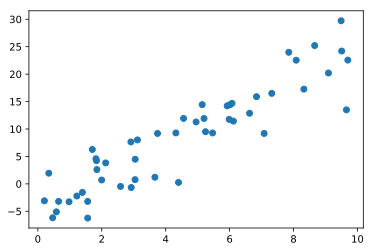

In [2]:
rng = np.random.RandomState(42)#semente de gerador de núm aleatório
#a = 3, intercepto = -5
x = 10 * rng.rand(50)#amostra com 50 núm aleatórios multiplicados por 10

y = 3 * x  -5 + 4*rng.randn(50)#variável dependente, 3 vezes o x menos 5 e outro número aleatório

plt.scatter(x, y)

#### Solução analitica
 $w = (X^T X)^{-1} X^T y$
 
Para solução da derivação [clique aqui](https://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression) 
<br>


Onde:
- w é o **vetor** de pesos (nossos parâmetros estimados)
- X é a matriz de valores, onde cada linha é uma observação e cada coluna é uma variável
- o Sobrescrito T indica "Transposto", ou seja, a matriz com um T é a matriz transposta.
- y é simplesmente o vetor da variável y.

In [3]:
#calculando o intercepto b  e a inclinação a pela Solução Analítica (método raiz).
X = x[:, np.newaxis]

# Um ponto importante aqui é adicionar uma coluna de "1s" que será nosso intercepto.
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])

z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
b, w1 = w[0], w[1] #essas três linhas são a fórmula w=(XTX)−1XTyw=(XTX)−1XTy da solução analítica acima.

print('Intercepto: %.2f' % b)
print('Inclinação: %.2f' % w1)

Intercepto: -4.61
Inclinação: 2.91


Intercepto beta_0:  -4.613242902124453
Inclinação beta_1:  2.9106264015412417


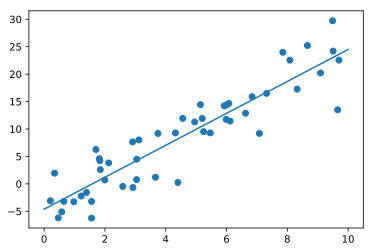

In [5]:
#utlizando o sklearn.linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yhat = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yhat)

print("Intercepto beta_0: ", model.intercept_)
print("Inclinação beta_1: ", model.coef_[0])

### MSE
Na estatística, o erro quadrático médio (MSE) ou o desvio médio quadrático (MSD) de um estimador mede a média dos quadrados dos erros - isto é, a diferença quadrática média entre os estimados valores e o que é estimado. MSE é uma função de risco, correspondente ao valor esperado da perda de erro quadrada. O fato de que o MSE é quase sempre estritamente positivo (e não zero) é por causa da aleatoriedade ou porque o estimador não leva em conta informações que poderiam produzir uma estimativa mais precisa.

O MSE é o segundo momento (sobre a origem) do erro e, portanto, incorpora tanto a variância do estimador (quão amplamente difundidas as estimativas são de uma amostra de dados para outra) quanto seu viés (a que distância o valor médio estimado é da verdade).

### RMSE

O RMSE (Root Mean Squared Error) representa simplesmente o MSE extraindo-se a raiz quadrada, para que o resultado fique na mesma unidade da variável estudada.

In [6]:
# Calculando os valores preditos pelo método raiz e calculando os Erros Quadráticos Médios

yhat = x*w1 + b
mse = np.mean((y - yhat)**2)
mse

13.169138299979002

In [7]:
# Extraindo a raiz quadrada para obter a resposta na mesma unidade de medida

# R = Root, Raiz
rmse = np.sqrt(mse)
rmse

3.6289307378316003

Text(0.5, 0, 'index')

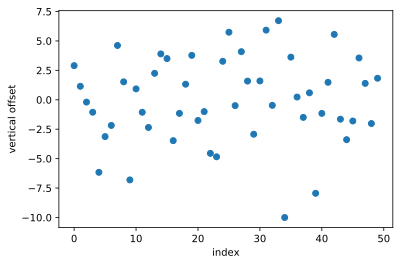

In [8]:
# Plotando a distribuição dos dados pelo respectivo erro em um gráfico de dispersão

plt.scatter(np.arange(x.shape[0]), y - yhat)
plt.ylabel('vertical offset')
plt.xlabel('index')

In [10]:
df = pd.DataFrame({'y_natureza':y,
              'y_chapeu': yhat})

In [11]:
df['erro'] = df['y_natureza'] - df['y_chapeu']

In [12]:
df['erro2'] = df['erro']*df['erro']

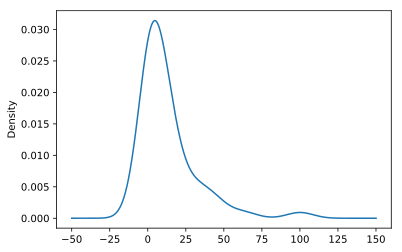

In [13]:
df['erro2'].plot.kde()

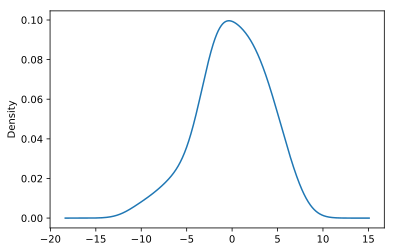

In [14]:
df['erro'].plot.kde()

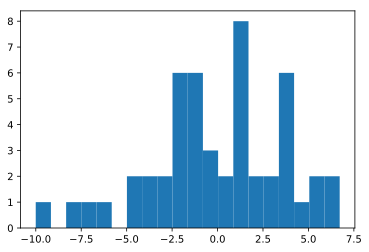

In [15]:
# Plotando a distribuição dos erros em um histograma

plt.hist(y - yhat, bins=20, )

plt.show()

# Coeficiente de Determinação ou $R^2$
$R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo. Ele é calculado como 1 menos a razão da soma dos quadrados dos erros (que é a variação que não é explicada pelo modelo) para a soma total dos quadrados (que é a variação total no modelo).

Quanto mais alto o valor de $R^2$ melhor o modelo ajusta seus dados. O valor de R2 está sempre entre 0 e 100%.

# R Quadrado Ajustado
Use o R2 ajustado quando desejar comparar modelos que têm diferentes números de preditores. R2 sempre aumenta quando você adiciona um preditor ao modelo, mesmo quando não existe uma verdadeira melhoria ao modelo. O valor de R2 ajustado incorpora o número de preditores no modelo para ajudá-lo a escolher o modelo correto.
Por exemplo, você trabalha para um fabricante de batatas fritas que examina os fatores que afetam a porcentagem de batatas quebradas por embalagem. Você recebe os seguintes resultados ao adicionar os preditores em uma abordagem stepwise. 

<br>
<img src="img/r2_ajustado.png" width="650" />
<br>

O primeiro modelo produz um R2 de mais de 50%. O segundo modelo adiciona a taxa de resfriamento ao modelo. O R2 ajustado aumenta, o que indica que a taxa de resfriamento melhora o modelo. O terceiro modelo, o que aumenta a temperatura de cozimento, aumenta o R2, mas não o R2 ajustado. Esses resultados indicam que a temperatura de cozimento não aprimoram o modelo. Com base nesses resultados, você considera remover a temperatura de cozimento do modelo. 

### Calculando o R Quadrado na prática

In [16]:
# Método raiz
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((yhat - mean_y)**2)
r_squared = SS_residual / SS_total
r_squared

0.8402866427699156

In [17]:
# método nutella
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
r_value**2

0.840286642769916